In [5]:
"""
This code seeks to analyze if place fields formed in different sessions have the same probability curve.
"""

from mylib.statistic_test import *
from mylib.statistic_test import GetMultidayIndexmap, ReadCellReg
from mylib.multiday.core import MultiDayCore

code_id = "0313 - Conditional Probability for Field Maintain"
loc = join(figpath, code_id, 'Novelty')
mkdir(loc)

if os.path.exists(join(figdata, code_id+' [Novelty].pkl')):
    with open(join(figdata, code_id+' [Novelty].pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    Data = DataFrameEstablish(variable_names = [
                             'Duration', 'Init Session', 'Conditional Prob.', 'Conditional Recover Prob.',
                             'Paradigm', 'On-Next Num', 'Off-Next Num'], 
                             f_member=['Type'], 
                             f = f_CellReg_modi, function = ConditionalProb_Interface_NovelFalimiar, 
                             file_name = code_id+' [Novelty]', behavior_paradigm = 'CrossMaze'
           )
    
# Statistical Analysis using one-way ANOVA
# Define a function to perform one-way ANOVA
def one_way_anova(data: dict, init_session_max: int, duration: int, key: str) -> None:
    
    groups = []
    for i in range(1, init_session_max+1):
        idx = np.where(
            (data['Duration'] == duration) &
            (data['Init Session'] == i)
        )[0]
        if len(idx) > 0:
            groups += [data[key][idx]]
    f_value, p_value = scipy.stats.f_oneway(*groups)
    return f"  F-value: {f_value:.4f}, p-value: {p_value}, len: {len(groups)}"

def walder_test(data: dict, init_session_max: int, duration: int, key: str) -> None:
    
    x = []
    groups = []
    for i in range(1, init_session_max+1):
        idx = np.where(
            (data['Duration'] == duration) &
            (data['Init Session'] == i)
        )[0]
        if len(idx) > 0:
            groups += [data[key][idx]]
            x.append(np.repeat(i, len(idx)))
    x = np.concatenate(x)
    y = np.concatenate(groups)
    
    idx = np.where((np.isnan(x) == False) & (np.isnan(y) == False))[0]
    x, y = x[idx], y[idx]
    
    return x, y

colors = sns.color_palette("rocket", 3)[1:]
markercolors = [sns.color_palette("Blues", 3)[1], sns.color_palette("Blues", 3)[2]]
chancecolors = ['#D4C9A8', '#8E9F85', '#C3AED6', '#FED7D7']

        D:\Data\FinalResults\0313 - Conditional Probability for Field Maintain\Novelty is already existed!


# Maze A (Fig. S11A)

  1 - 0.5571988993132497 - 139
  2 - 0.35273479965786414 - 139
  3 - 0.3122796670106024 - 131
  4 - 0.392045907470593 - 123
  5 - 0.9762561715268473 - 111
  6 - 0.003286809758859285 - 103
  7 - 0.003145544051234825 - 95
  8 - 0.003847811968981803 - 87
  9 - 0.5432158681384387 - 79
  10 - 0.19679203917909777 - 71
  11 - 0.7484252545180792 - 59


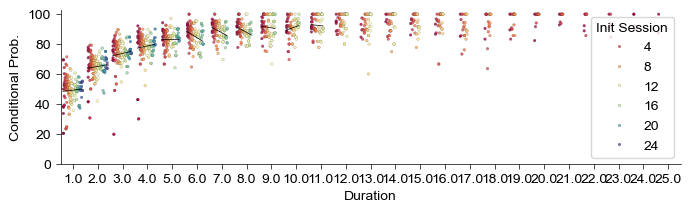

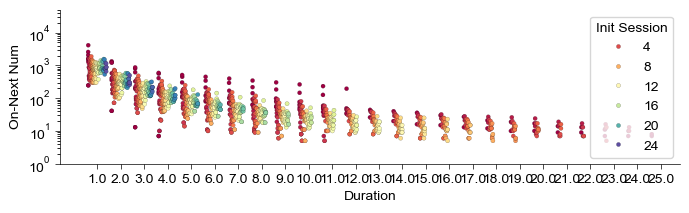

In [38]:
#Data['hue'] = np.array([Data['Papadigm'][i] + ' ' + Data['Maze Type'][i] for i in range(Data['Duration'].shape[0])])
idx = np.where((Data['Paradigm'] == 'CrossMaze')&
               (np.isnan(Data['Conditional Prob.']) == False)&
               (Data['Maze Type'] != 'Open Field')&
               (Data['Type'] == 'Real'))[0]
SubData = SubDict(Data, Data.keys(), idx=idx)

idx1 = np.where(SubData['Maze Type'] == 'Maze 1')[0]
idx2 = np.where(SubData['Maze Type'] == 'Maze 2')[0]

fig = plt.figure(figsize=(8, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
for i in range(1, 12):
    idx = np.where((SubData['Duration'] == i) & (SubData['Maze Type'] == 'Maze 1'))[0]
    x, y = walder_test(SubDict(SubData, SubData.keys(), idx=idx), 25, i, 'Conditional Prob.')
    res = linregress(x, y)
    print(f"  {i} - {res.pvalue} - {len(x)}")
    y_plot = res.intercept + res.slope*np.array([1, np.max(x)])
    x = x.astype(np.float64)/25
    
    x_plot = np.linspace(i-1.4, i-1.4+np.max(x)*0.8, 2)
    ax.plot(x_plot, y_plot, color='k', linewidth=0.5, zorder=3)
    

sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubDict(SubData, SubData.keys(), idx=idx1),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=2,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0,
    zorder=1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'Conditional prob [Maze 1].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional prob [Maze 1].svg'), dpi = 600)
plt.show()

fig = plt.figure(figsize=(8, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'On-Next Num',
    data=SubDict(SubData, SubData.keys(), idx=idx1),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.1,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.semilogy()
ax.set_ylim(1, 50000)
plt.savefig(join(loc, 'On-next num [Maze 1].png'), dpi = 600)
plt.savefig(join(loc, 'On-next num [Maze 1].svg'), dpi = 600)
plt.show()
# Statistical Test
    

# Fig. S11B

  1 - 0.849767727086194 (66,)
  2 - 0.15943261645560258 (66,)
  3 - 0.1644651165912349 (60,)
  4 - 0.3227018827950625 (54,)
  5 - 0.24641775852187942 (48,)
  6 - 0.5446302766333535 (42,)
  7 - 0.02791044098006637 (36,)
  8 - 0.006920877986349033 (30,)
  9 - 0.04775477455314529 (22,)
  10 - 0.5907033444587584 (16,)
  11 - 0.5846445671097262 (12,)


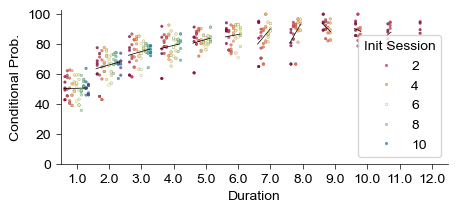

Maze B - Conditional Prob.:
  1 -   F-value: 0.6777, p-value: 0.7401696091478521, len: 11
  2 -   F-value: 1.3580, p-value: 0.22433650500676067, len: 11
  3 -   F-value: 1.1913, p-value: 0.3213059415599884, len: 10
  4 -   F-value: 0.9060, p-value: 0.5200399478376456, len: 9
  5 -   F-value: 1.1830, p-value: 0.33426290961971067, len: 8
  6 -   F-value: 1.8853, p-value: 0.11108882671682602, len: 7
  7 -   F-value: 2.1375, p-value: 0.08809433401518252, len: 6
  8 -   F-value: 3.0703, p-value: 0.03465117125720211, len: 5
  9 -   F-value: 1.5860, p-value: 0.2275610357868199, len: 4
  10 -   F-value: 0.1407, p-value: 0.8700368891832406, len: 3
  11 -   F-value: 0.3190, p-value: 0.584644567109726, len: 2


In [37]:
fig = plt.figure(figsize=(5, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
for i in range(1, 12):
    idx = np.where((SubData['Duration'] == i) & (SubData['Maze Type'] == 'Maze 2'))[0]
    x, y = walder_test(SubDict(SubData, SubData.keys(), idx=idx), 12, i, 'Conditional Prob.')
    res = linregress(x, y)
    print(f"  {i} - {res.pvalue} {x.shape}")
    y_plot = res.intercept + res.slope*np.array([1, np.max(x)])
    x = x.astype(np.float64)/12
    
    x_plot = np.linspace(i-1.4, i-1.4+np.max(x)*0.8, 2)
    ax.plot(x_plot, y_plot, color='k', linewidth=0.5, zorder=3)
    
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubDict(SubData, SubData.keys(), idx=idx2),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=2,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0,
    zorder=1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'Conditional prob [Maze 2].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional prob [Maze 2].svg'), dpi = 600)
plt.show()
fig = plt.figure(figsize=(5, 2.5))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'On-Next Num',
    data=SubDict(SubData, SubData.keys(), idx=idx2),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.1,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.semilogy()
ax.set_ylim(1, 50000)
plt.savefig(join(loc, 'On-next num [Maze 2].png'), dpi = 600)
plt.savefig(join(loc, 'On-next num [Maze 2].svg'), dpi = 600)
plt.close()

print("Maze B - Conditional Prob.:")
for dur in range(1, 12):
    print(f"  {dur} - "+one_way_anova(SubDict(SubData, SubData.keys(), idx=idx2), duration = dur, init_session_max=12, key = 'Conditional Prob.'))

# Recovery Probability Fig. S11G, S11H

<Figure size 400x200 with 0 Axes>

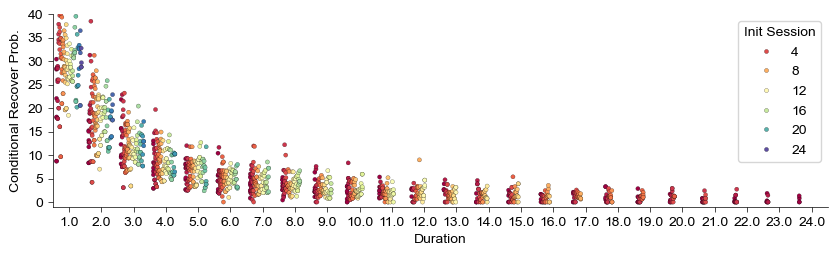

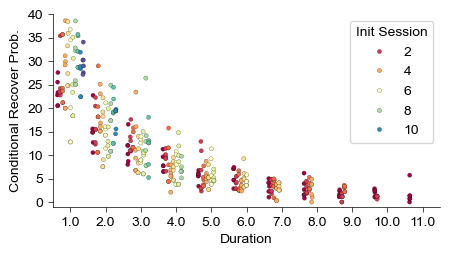

Maze A - Conditional Recover Prob.:
  1 -   F-value: 1.5485, p-value: 0.13111964864877218, len: 12
  2 -   F-value: 1.2903, p-value: 0.24676159419275676, len: 12
  3 -   F-value: 0.8338, p-value: 0.6072403201684643, len: 12
  4 -   F-value: 0.8825, p-value: 0.5613406869310021, len: 12
  5 -   F-value: 0.9531, p-value: 0.4974389108693529, len: 12
  6 -   F-value: 0.5292, p-value: 0.875745368571163, len: 12
  7 -   F-value: 0.4392, p-value: 0.9311778091669753, len: 12
  8 -   F-value: 0.8626, p-value: 0.5809665587134405, len: 12
  9 -   F-value: 1.4932, p-value: 0.16605902136804887, len: 12
  10 -   F-value: 2.1045, p-value: 0.0408217387539972, len: 12
  11 -   F-value: 1.6918, p-value: 0.11179047480264831, len: 12

Maze B - Conditional Recover Prob.:
  1 -   F-value: 1.2483, p-value: 0.28236470181513385, len: 11
  2 -   F-value: 0.8786, p-value: 0.5503768289565942, len: 10
  3 -   F-value: 0.7210, p-value: 0.6719837464842187, len: 9
  4 -   F-value: 1.2208, p-value: 0.31424098605212125,

In [ ]:
fig = plt.figure(figsize=(4,2))
idx = np.where((Data['Paradigm'] == 'CrossMaze')&
               (np.isnan(Data['Conditional Recover Prob.']) == False)&
               (Data['Maze Type'] != 'Open Field')&
               (Data['Type'] == 'Real'))[0]

SubData = SubDict(Data, Data.keys(), idx=idx)
idx1 = np.where(SubData['Maze Type'] == 'Maze 1')[0]
idx2 = np.where(SubData['Maze Type'] == 'Maze 2')[0]


fig = plt.figure(figsize=(10, 2.5))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubDict(SubData, SubData.keys(), idx=idx1),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))

plt.savefig(join(loc, 'Conditional recover prob [Maze 1].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [Maze 1].svg'), dpi = 600)
plt.show()

fig = plt.figure(figsize=(5, 2.5))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubDict(SubData, SubData.keys(), idx=idx2),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))

plt.savefig(join(loc, 'Conditional recover prob [Maze 2].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [Maze 2].svg'), dpi = 600)
plt.show()

# Statistical Test
print("Maze A - Conditional Recover Prob.:")
for dur in range(1, 12):
    print(f"  {dur} - "+one_way_anova(SubDict(SubData, SubData.keys(), idx=idx1), duration = dur, init_session_max=12, key = 'Conditional Recover Prob.'))
print()
print("Maze B - Conditional Recover Prob.:")
for dur in range(1, 11):
    print(f"  {dur} - "+one_way_anova(SubDict(SubData, SubData.keys(), idx=idx2), duration = dur, init_session_max=12, key = 'Conditional Recover Prob.'))
print()

# MAf, MAb, HPf, HPb (Fig. S11 remaining不需要改)

  1 - 0.015363254858216746 (30,)
  2 - 0.06229536874460281 (30,)
  3 - 0.1593628397970311 (26,)
  4 - 0.4713345911107112 (21,)
  5 - 0.15263358430610358 (16,)
  6 - 0.19831712483955954 (11,)


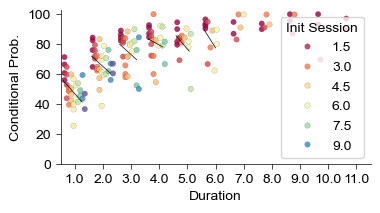

MAf - Conditional Prob.:
  1 -   F-value: 3.6213, p-value: 0.022129246931235955, len: 6
  2 -   F-value: 1.4085, p-value: 0.27377733575151697, len: 6
  3 -   F-value: 2.2638, p-value: 0.104882323056309, len: 6
  4 -   F-value: 1.0066, p-value: 0.45808637642742095, len: 6
  5 -   F-value: 0.7714, p-value: 0.5959902036887479, len: 6

MAf - Conditional Recover Prob.:
  1 -   F-value: 0.6486, p-value: 0.6365526644144124, len: 5
  2 -   F-value: 0.4311, p-value: 0.7838206052258404, len: 5
  3 -   F-value: 0.5239, p-value: 0.7205334484701156, len: 5
  4 -   F-value: 1.2440, p-value: 0.359087827808611, len: 5

  1 - 0.3707129040291435 (30,)
  2 - 0.7281313748715492 (30,)
  3 - 0.8800431117280687 (26,)
  4 - 0.7082585255527845 (22,)
  5 - 0.41638724333072763 (18,)
  6 - 0.6660384706548721 (14,)


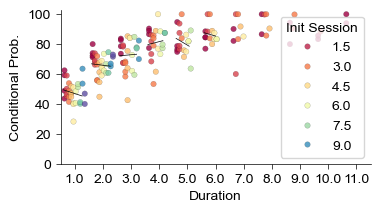

MAb - Conditional Prob.:
  1 -   F-value: 1.7945, p-value: 0.17092694797513325, len: 6
  2 -   F-value: 3.3335, p-value: 0.029788142829046575, len: 6
  3 -   F-value: 1.9951, p-value: 0.1418645619971804, len: 6
  4 -   F-value: 0.6018, p-value: 0.7000290458522904, len: 6
  5 -   F-value: 1.1204, p-value: 0.4089783696979102, len: 6

MAb - Conditional Recover Prob.:
  1 -   F-value: 0.2871, p-value: 0.8817679333015381, len: 5
  2 -   F-value: 0.5871, p-value: 0.6777714932570327, len: 5
  3 -   F-value: 1.4866, p-value: 0.2720131149709554, len: 5
  4 -   F-value: 1.5752, p-value: 0.2619256454077807, len: 5

  1 - 0.1317565691318628 (20,)
  2 - 0.4423693428542099 (20,)
  3 - 0.7866316863100813 (16,)
  4 - 0.6314772257589998 (12,)
  5 - 0.9903301516733773 (8,)


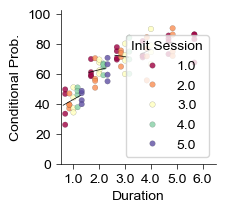

HPf - Conditional Prob.:
  1 -   F-value: 0.6389, p-value: 0.642806554505863, len: 5
  2 -   F-value: 0.7279, p-value: 0.5866468267411984, len: 5
  3 -   F-value: 0.1153, p-value: 0.9494319316042634, len: 4
  4 -   F-value: 0.3158, p-value: 0.7369662443020221, len: 3
  5 -   F-value: 0.0002, p-value: 0.9903301516733649, len: 2

HPf - Conditional Recover Prob.:
  1 -   F-value: 4.2013, p-value: 0.01768870605485437, len: 5
  2 -   F-value: 2.1703, p-value: 0.14454594669746806, len: 4
  3 -   F-value: 0.1172, p-value: 0.8907475077271723, len: 3
  4 -   F-value: 0.3743, p-value: 0.5631067822230527, len: 2

  1 - 0.5058083685542367 (20,)
  2 - 0.3675405042709712 (20,)
  3 - 0.21288496539460636 (16,)
  4 - 0.8891843959556437 (12,)
  5 - 0.8690189230400852 (8,)


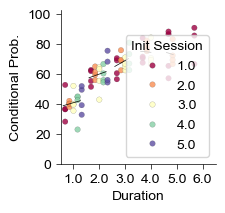

HPb - Conditional Prob.:
  1 -   F-value: 0.2388, p-value: 0.911997261014808, len: 5
  2 -   F-value: 0.5282, p-value: 0.7168172715507576, len: 5
  3 -   F-value: 0.9432, p-value: 0.4503129497825594, len: 4
  4 -   F-value: 0.8607, p-value: 0.4549500350176008, len: 3
  5 -   F-value: 0.0296, p-value: 0.8690189230400857, len: 2

HPb - Conditional Recover Prob.:
  1 -   F-value: 1.0232, p-value: 0.4270110356998808, len: 5
  2 -   F-value: 2.4567, p-value: 0.11318840562999857, len: 4
  3 -   F-value: 0.1361, p-value: 0.8744841187944755, len: 3
  4 -   F-value: 0.0213, p-value: 0.8886395277660623, len: 2



In [49]:
# MAf ----------------------------------------------------------------------------
idx = np.where(
    (Data['Paradigm'] == 'ReverseMaze cis') &
    (np.isnan(Data['Conditional Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
for i in range(1, 7):
    idx = np.where((SubData['Duration'] == i))[0]
    x, y = walder_test(SubDict(SubData, SubData.keys(), idx=idx), 12, i, 'Conditional Prob.')
    res = linregress(x, y)
    print(f"  {i} - {res.pvalue} {x.shape}")
    y_plot = res.intercept + res.slope*np.array([1, np.max(x)])
    x = x.astype(np.float64)/12
    
    x_plot = np.linspace(i-1.4, i-1.4+np.max(x)*0.8, 2)
    ax.plot(x_plot, y_plot, color='k', linewidth=0.5, zorder=3)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0,
    zorder=1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'conditional prob [MAf].png'), dpi = 600)
plt.savefig(join(loc, 'conditional prob [MAf].svg'), dpi = 600)
plt.show()

print("MAf - Conditional Prob.:")
for dur in range(1, 6):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=6, key = 'Conditional Prob.'))
print()

idx = np.where(
    (Data['Paradigm'] == 'ReverseMaze cis') &
    (np.isnan(Data['Conditional Recover Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, 'Conditional recover prob [MAf].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [MAf].svg'), dpi = 600)
plt.close()
print("MAf - Conditional Recover Prob.:")
for dur in range(1, 5):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=5, key = 'Conditional Recover Prob.'))
print()

# MAb ----------------------------------------------------------------------------
idx = np.where(
    (Data['Paradigm'] == 'ReverseMaze trs') &
    (np.isnan(Data['Conditional Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
for i in range(1, 7):
    idx = np.where((SubData['Duration'] == i))[0]
    x, y = walder_test(SubDict(SubData, SubData.keys(), idx=idx), 12, i, 'Conditional Prob.')
    res = linregress(x, y)
    print(f"  {i} - {res.pvalue} {x.shape}")
    y_plot = res.intercept + res.slope*np.array([1, np.max(x)])
    x = x.astype(np.float64)/12
    
    x_plot = np.linspace(i-1.4, i-1.4+np.max(x)*0.8, 2)
    ax.plot(x_plot, y_plot, color='k', linewidth=0.5, zorder=3)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0,
    zorder=1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'conditional prob [MAb].png'), dpi = 600)
plt.savefig(join(loc, 'conditional prob [MAb].svg'), dpi = 600)
plt.show()

print("MAb - Conditional Prob.:")
for dur in range(1, 6):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=6, key = 'Conditional Prob.'))
print()

idx = np.where(
    (Data['Paradigm'] == 'ReverseMaze trs') &
    (np.isnan(Data['Conditional Recover Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, 'Conditional recover prob [MAb].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [MAb].svg'), dpi = 600)
plt.close()
print("MAb - Conditional Recover Prob.:")
for dur in range(1, 5):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=5, key = 'Conditional Recover Prob.'))
print()


# HPf ----------------------------------------------------------------------------
idx = np.where(
    (Data['Paradigm'] == 'HairpinMaze cis') &
    (np.isnan(Data['Conditional Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
for i in range(1, 6):
    idx = np.where((SubData['Duration'] == i))[0]
    x, y = walder_test(SubDict(SubData, SubData.keys(), idx=idx), 6, i, 'Conditional Prob.')
    res = linregress(x, y)
    print(f"  {i} - {res.pvalue} {x.shape}")
    y_plot = res.intercept + res.slope*np.array([1, np.max(x)])
    x = x.astype(np.float64)/6
    
    x_plot = np.linspace(i-1.4, i-1.4+np.max(x)*0.8, 2)
    ax.plot(x_plot, y_plot, color='k', linewidth=0.5, zorder=3)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0,
    zorder=1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'conditional prob [HPf].png'), dpi = 600)
plt.savefig(join(loc, 'conditional prob [HPf].svg'), dpi = 600)
plt.show()

print("HPf - Conditional Prob.:")
for dur in range(1, 6):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=6, key = 'Conditional Prob.'))
print()

idx = np.where(
    (Data['Paradigm'] == 'HairpinMaze cis') &
    (np.isnan(Data['Conditional Recover Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, 'Conditional recover prob [HPf].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [HPf].svg'), dpi = 600)
plt.close()
print("HPf - Conditional Recover Prob.:")
for dur in range(1, 5):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=5, key = 'Conditional Recover Prob.'))
print()

# HPb ----------------------------------------------------------------------------
idx = np.where(
    (Data['Paradigm'] == 'HairpinMaze trs') &
    (np.isnan(Data['Conditional Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
for i in range(1, 6):
    idx = np.where((SubData['Duration'] == i))[0]
    x, y = walder_test(SubDict(SubData, SubData.keys(), idx=idx), 6, i, 'Conditional Prob.')
    res = linregress(x, y)
    print(f"  {i} - {res.pvalue} {x.shape}")
    y_plot = res.intercept + res.slope*np.array([1, np.max(x)])
    x = x.astype(np.float64)/6
    
    x_plot = np.linspace(i-1.4, i-1.4+np.max(x)*0.8, 2)
    ax.plot(x_plot, y_plot, color='k', linewidth=0.5, zorder=3)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0,
    zorder=1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'conditional prob [HPb].png'), dpi = 600)
plt.savefig(join(loc, 'conditional prob [HPb].svg'), dpi = 600)
plt.show()

print("HPb - Conditional Prob.:")
for dur in range(1, 6):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=6, key = 'Conditional Prob.'))
print()

idx = np.where(
    (Data['Paradigm'] == 'HairpinMaze trs') &
    (np.isnan(Data['Conditional Recover Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, 'Conditional recover prob [HPb].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [HPb].svg'), dpi = 600)
plt.close()
print("HPb - Conditional Recover Prob.:")
for dur in range(1, 5):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=5, key = 'Conditional Recover Prob.'))
print()